In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier, cv, DMatrix, plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data_raw = pd.read_csv("../data/parkinsons.data")

features = data_raw.loc[:, data_raw.columns != "status"].values[:, 1:]
y = data_raw.loc[:, "status"].values
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(features)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [9]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [14]:
dmatrix = DMatrix(X, y,)

In [29]:
xgb = XGBClassifier()
xgb.fit(X=X,y=y)
xgb_cv = cv(dtrain=dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

[02:29:16] WARNING: /private/var/folders/bc/zb0t647s3pg_fwx03bl1133m0000gq/T/pip-install-bfhv4oow/xgboost_c47998d7b21e45eb9a976acc2df551f1/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/dima/PycharmProjects/detecting-parkinsons-xgboost/venv/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


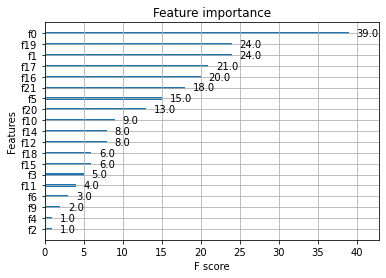

<Figure size 1152x864 with 0 Axes>

In [30]:
plot_importance(xgb)
plt.figure(figsize = (16, 12))
plt.show()